In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


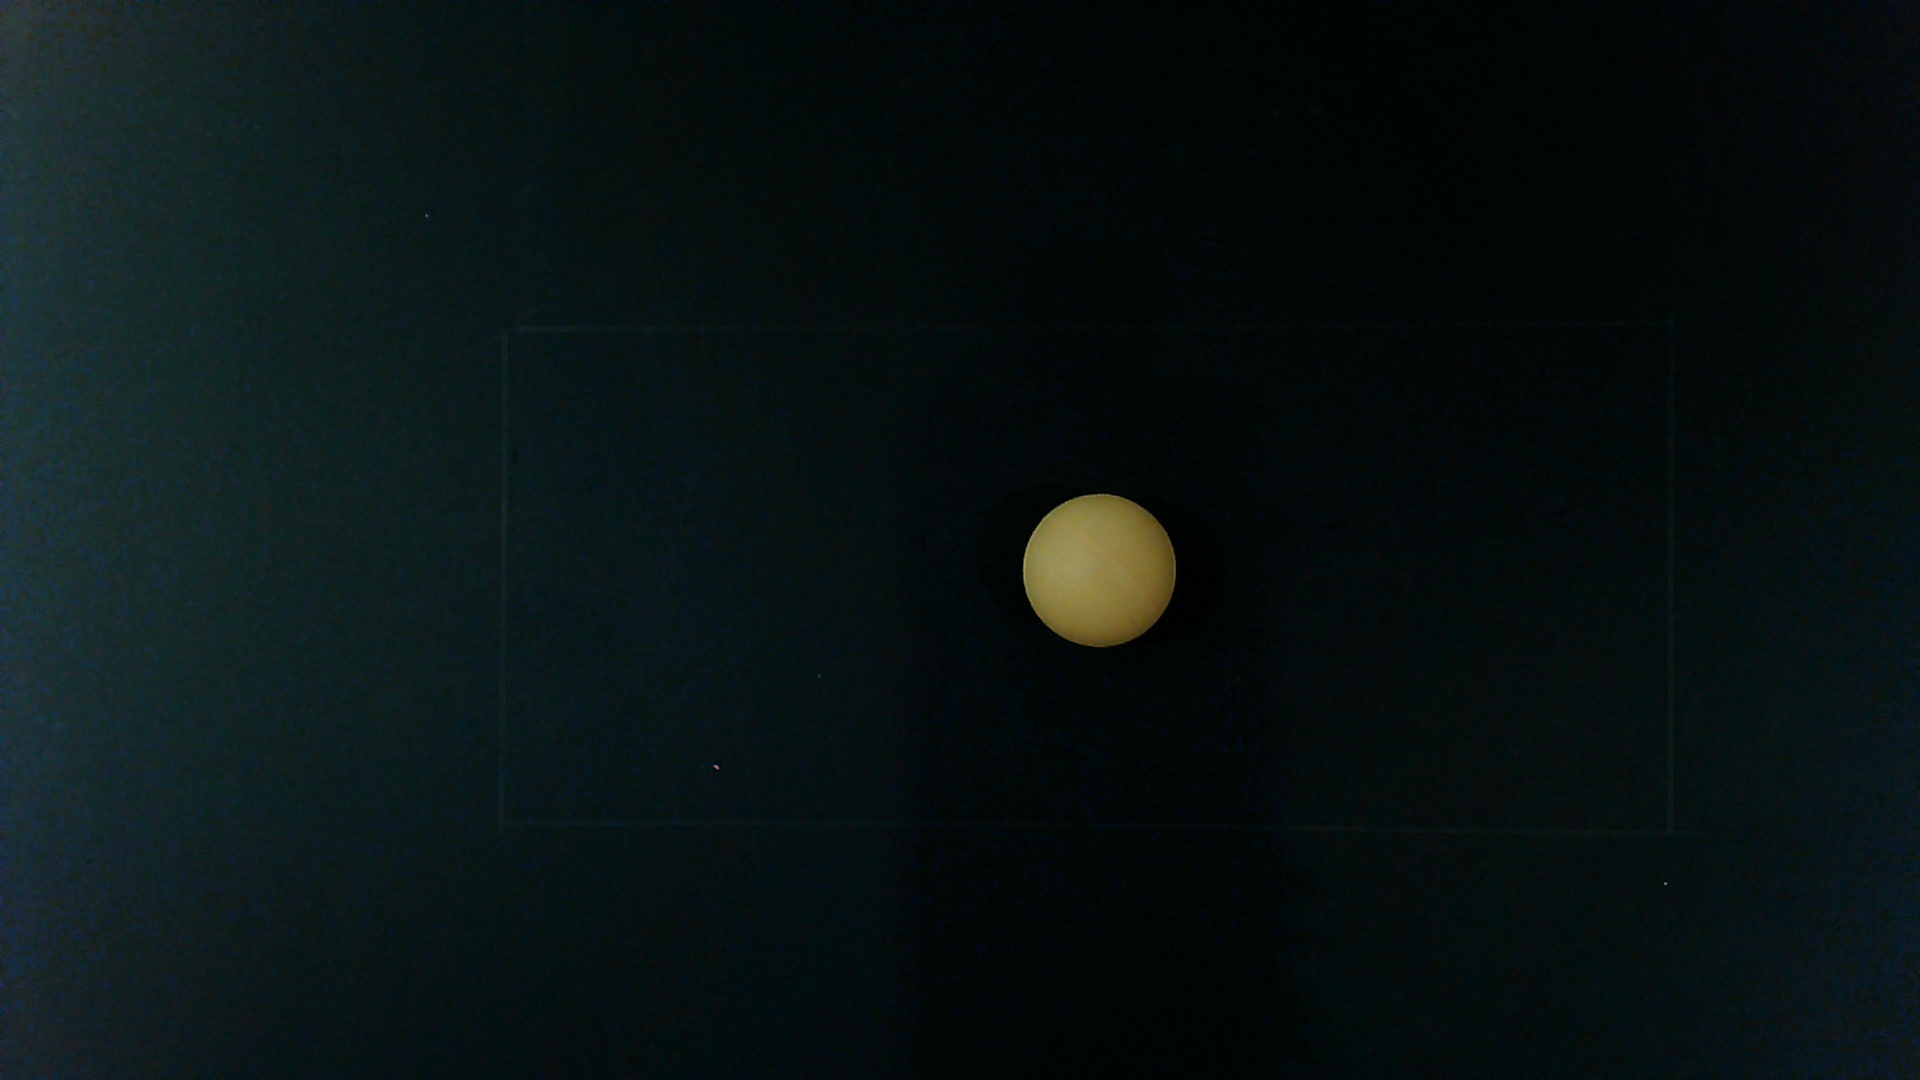

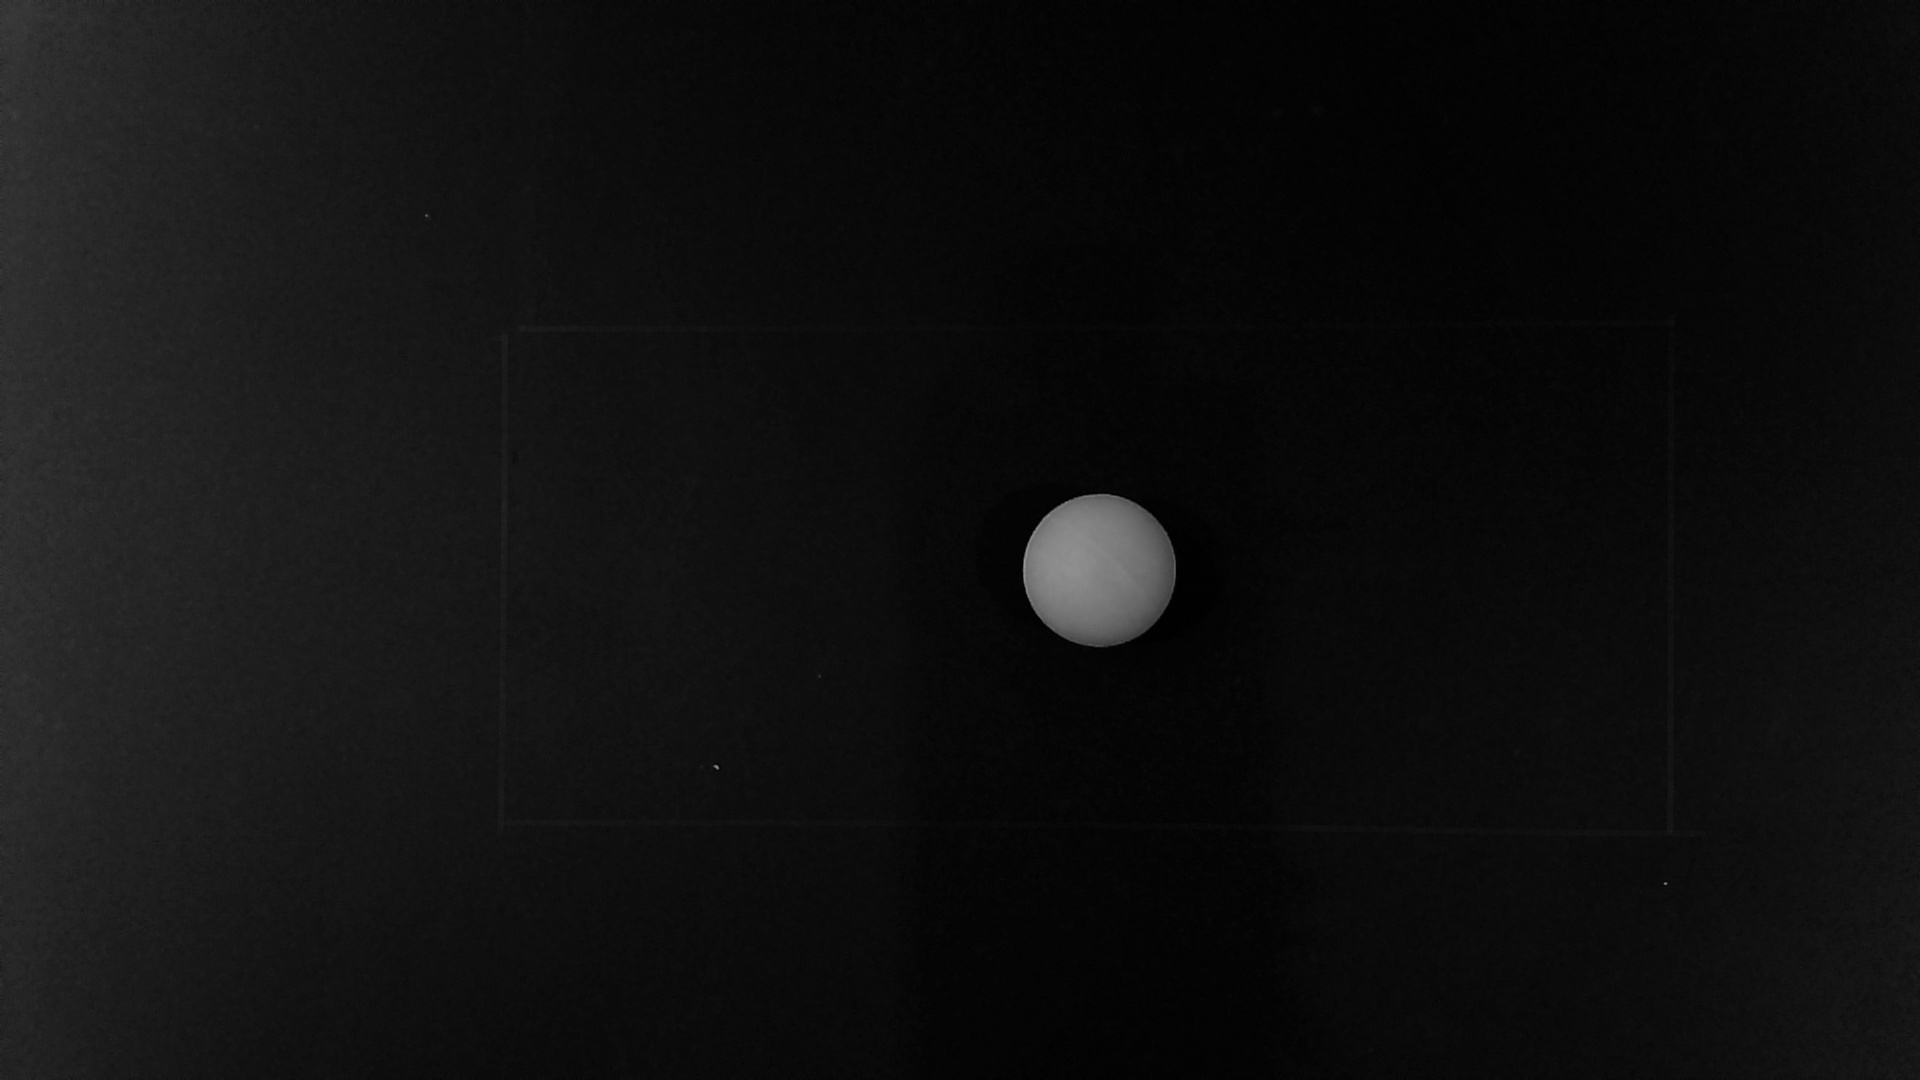

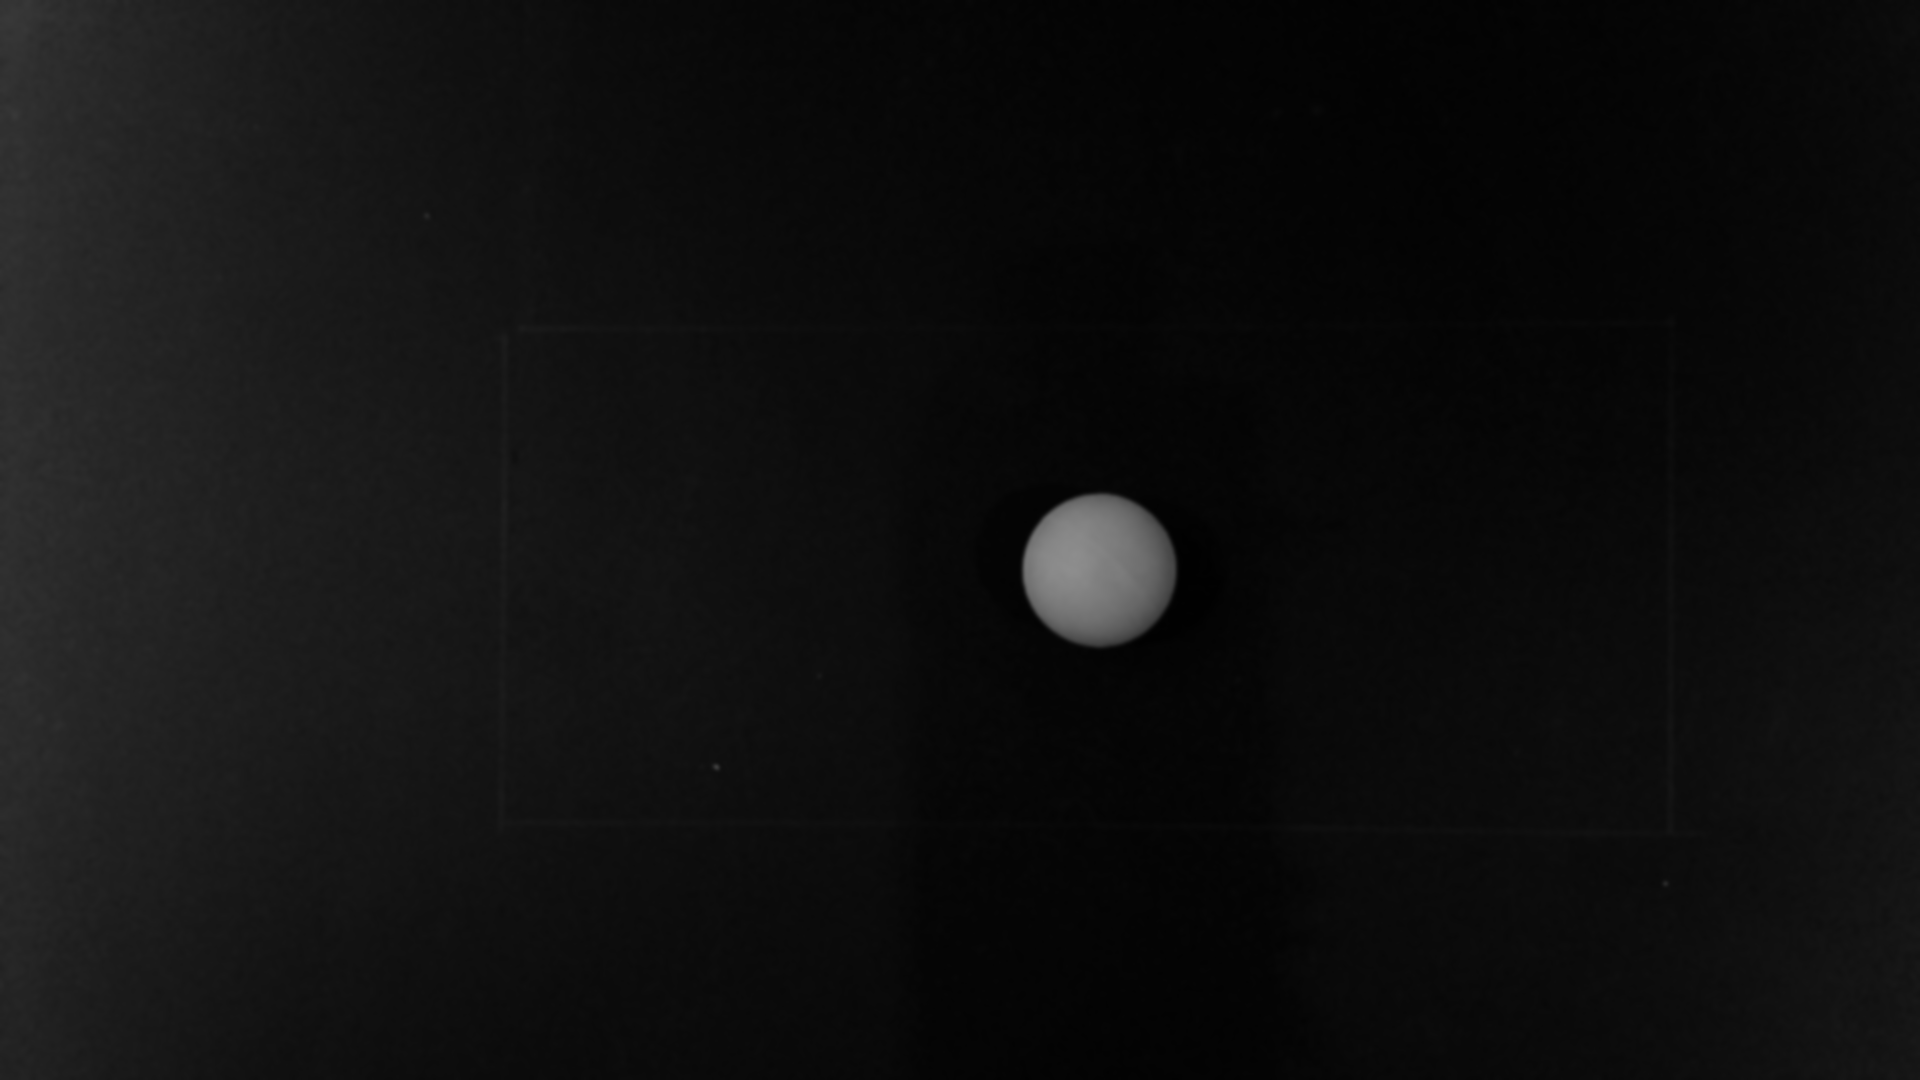

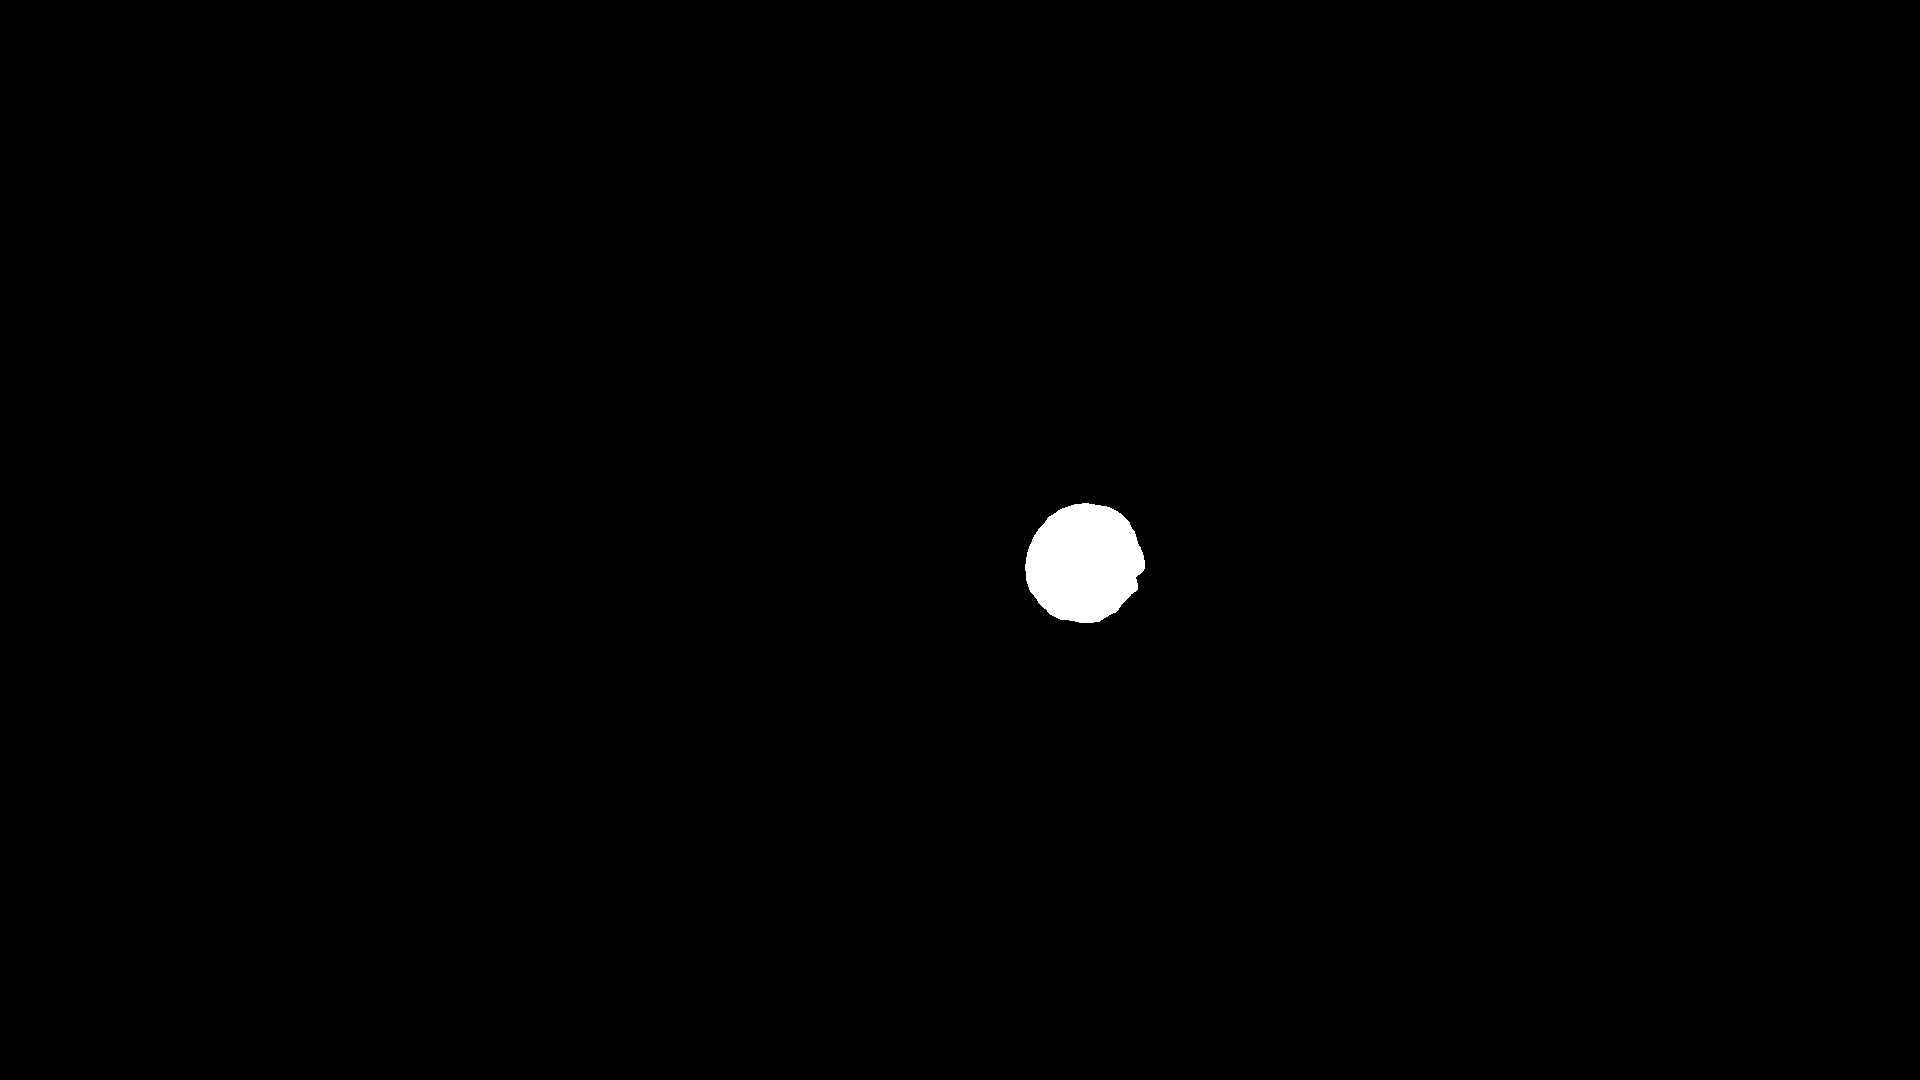

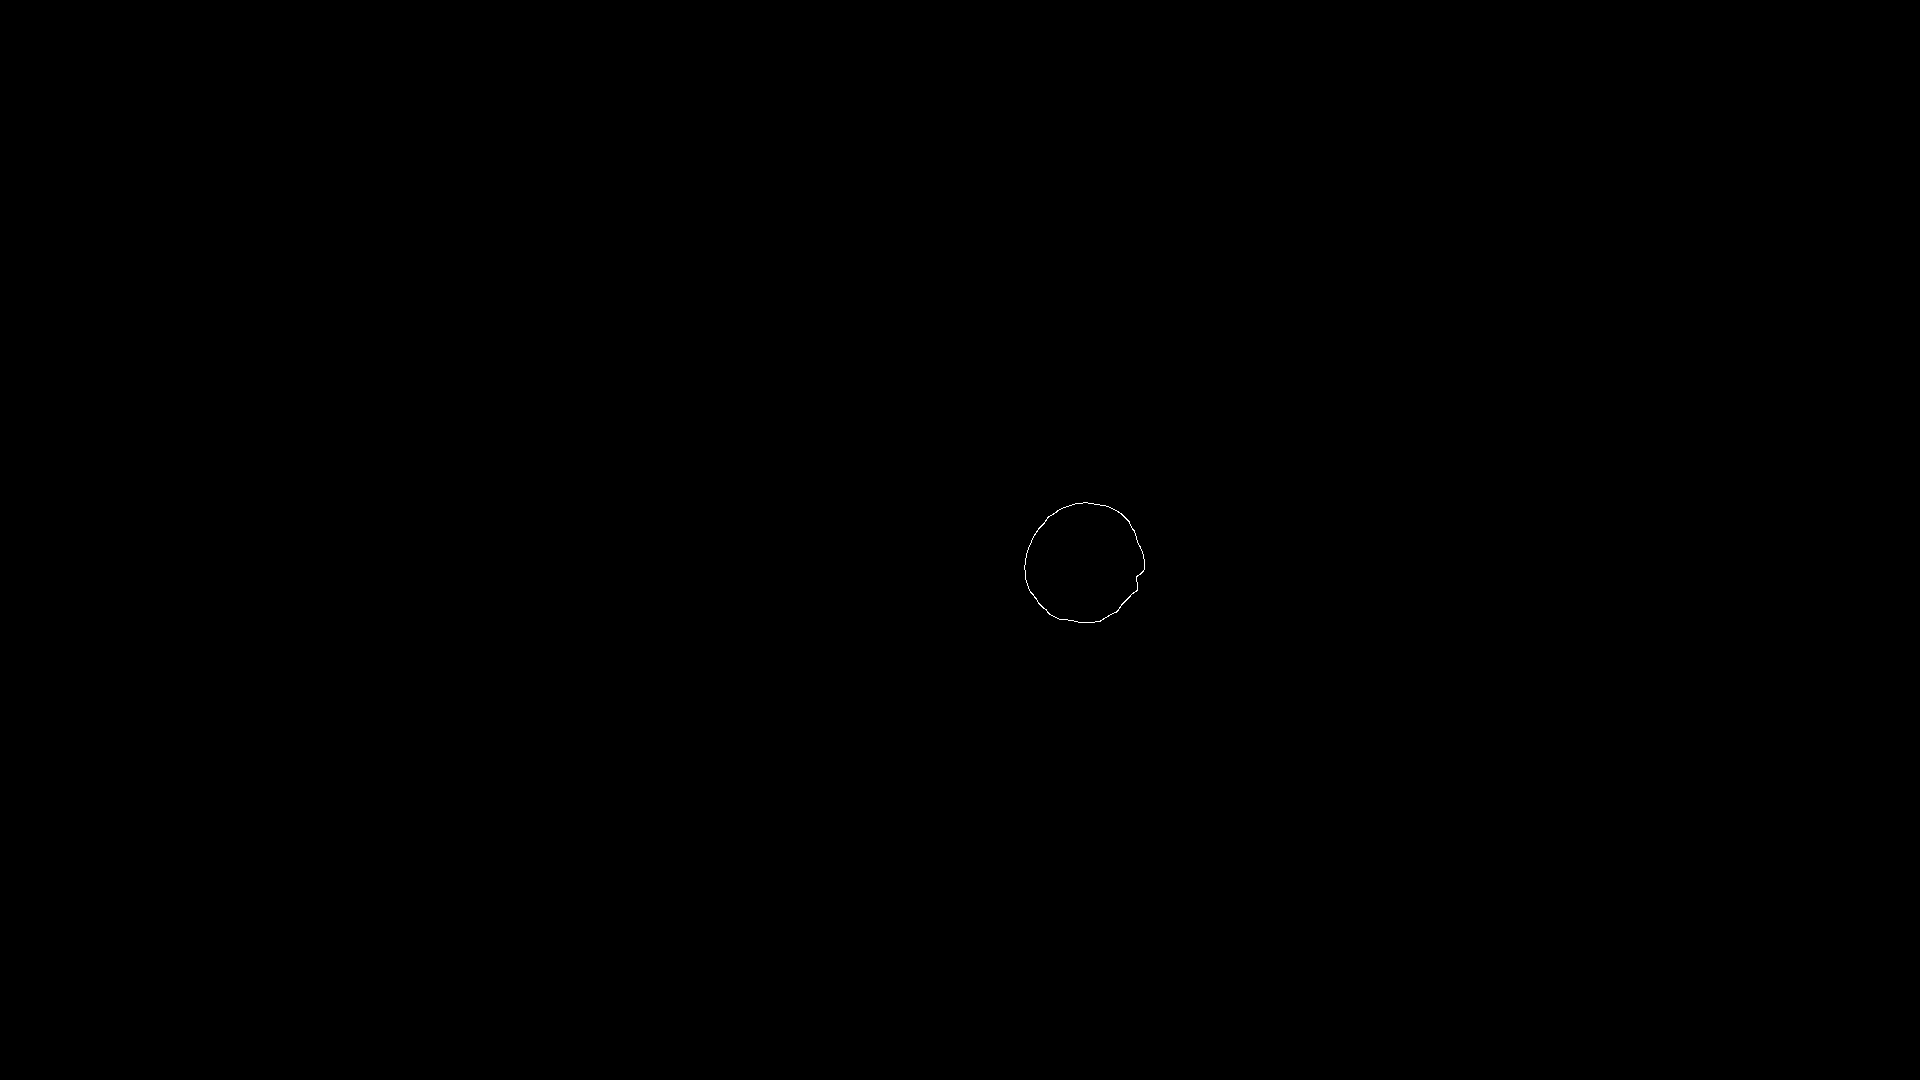

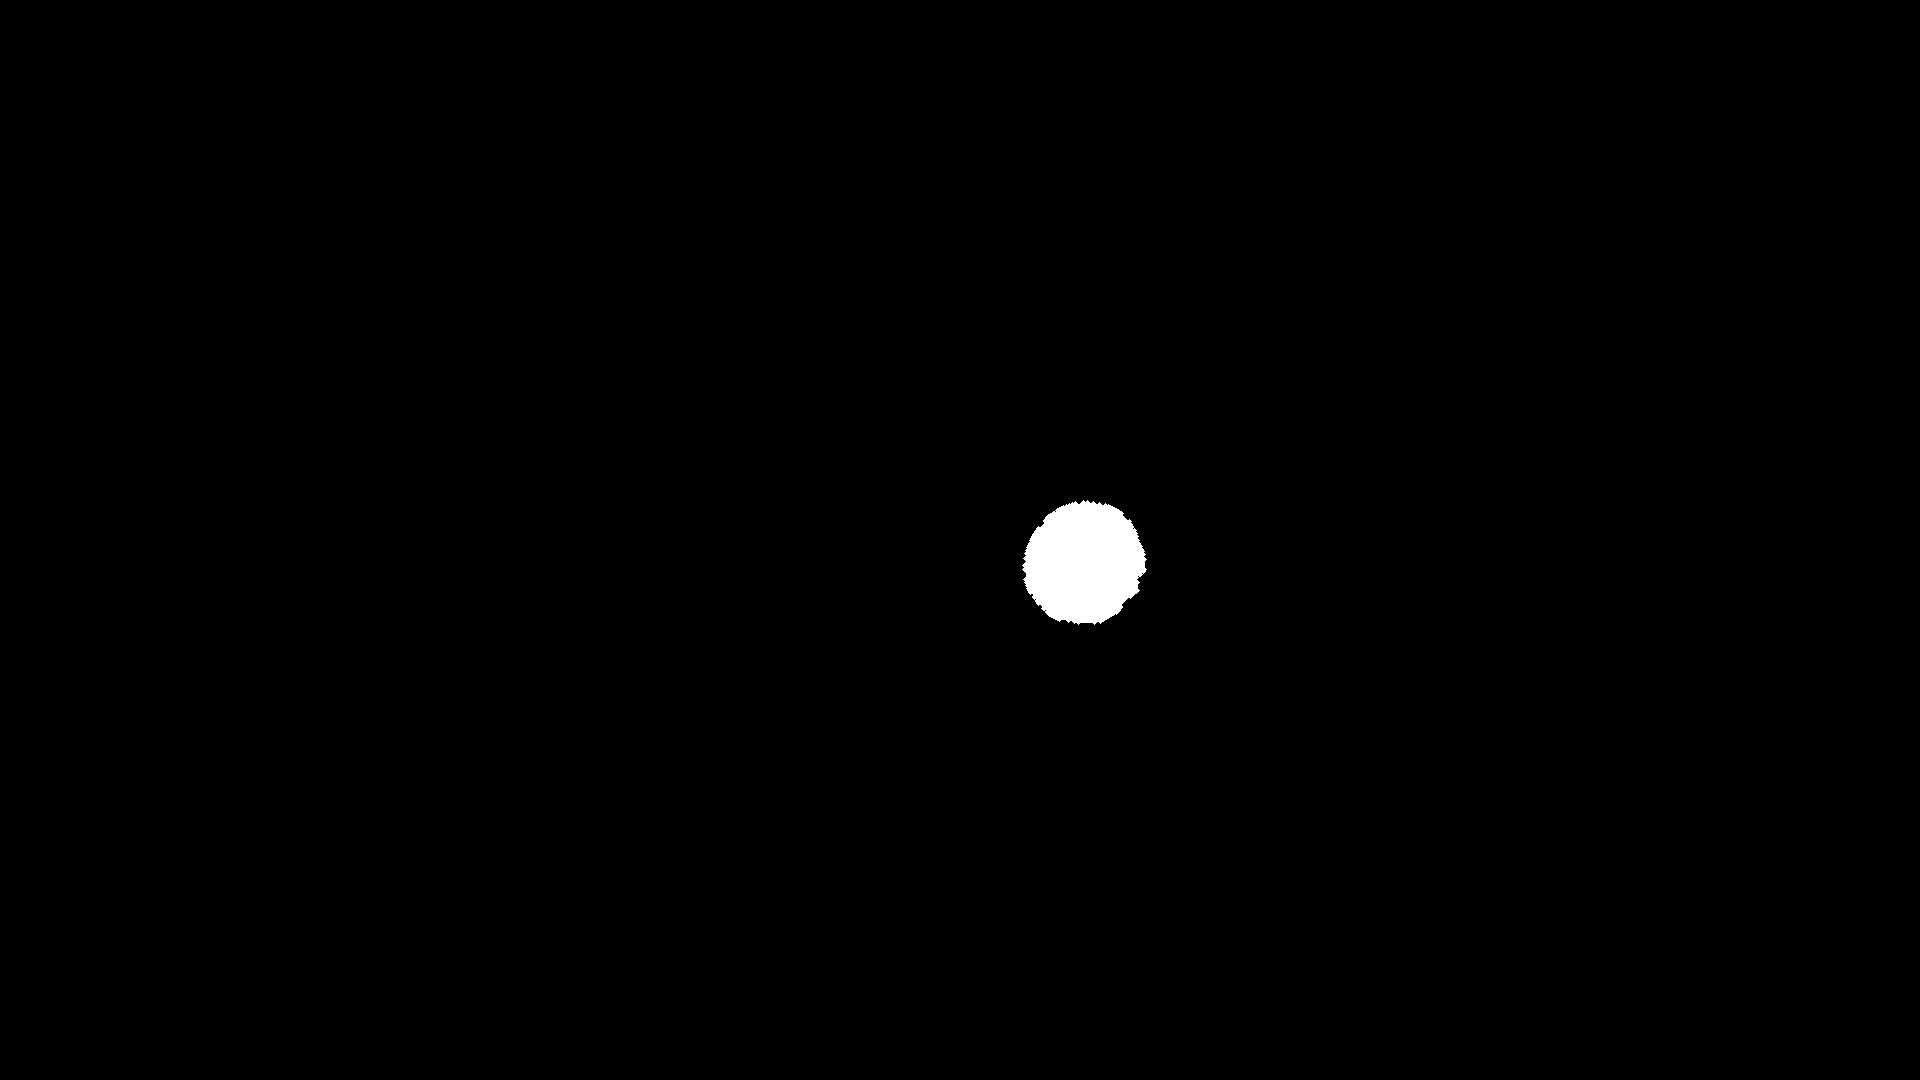

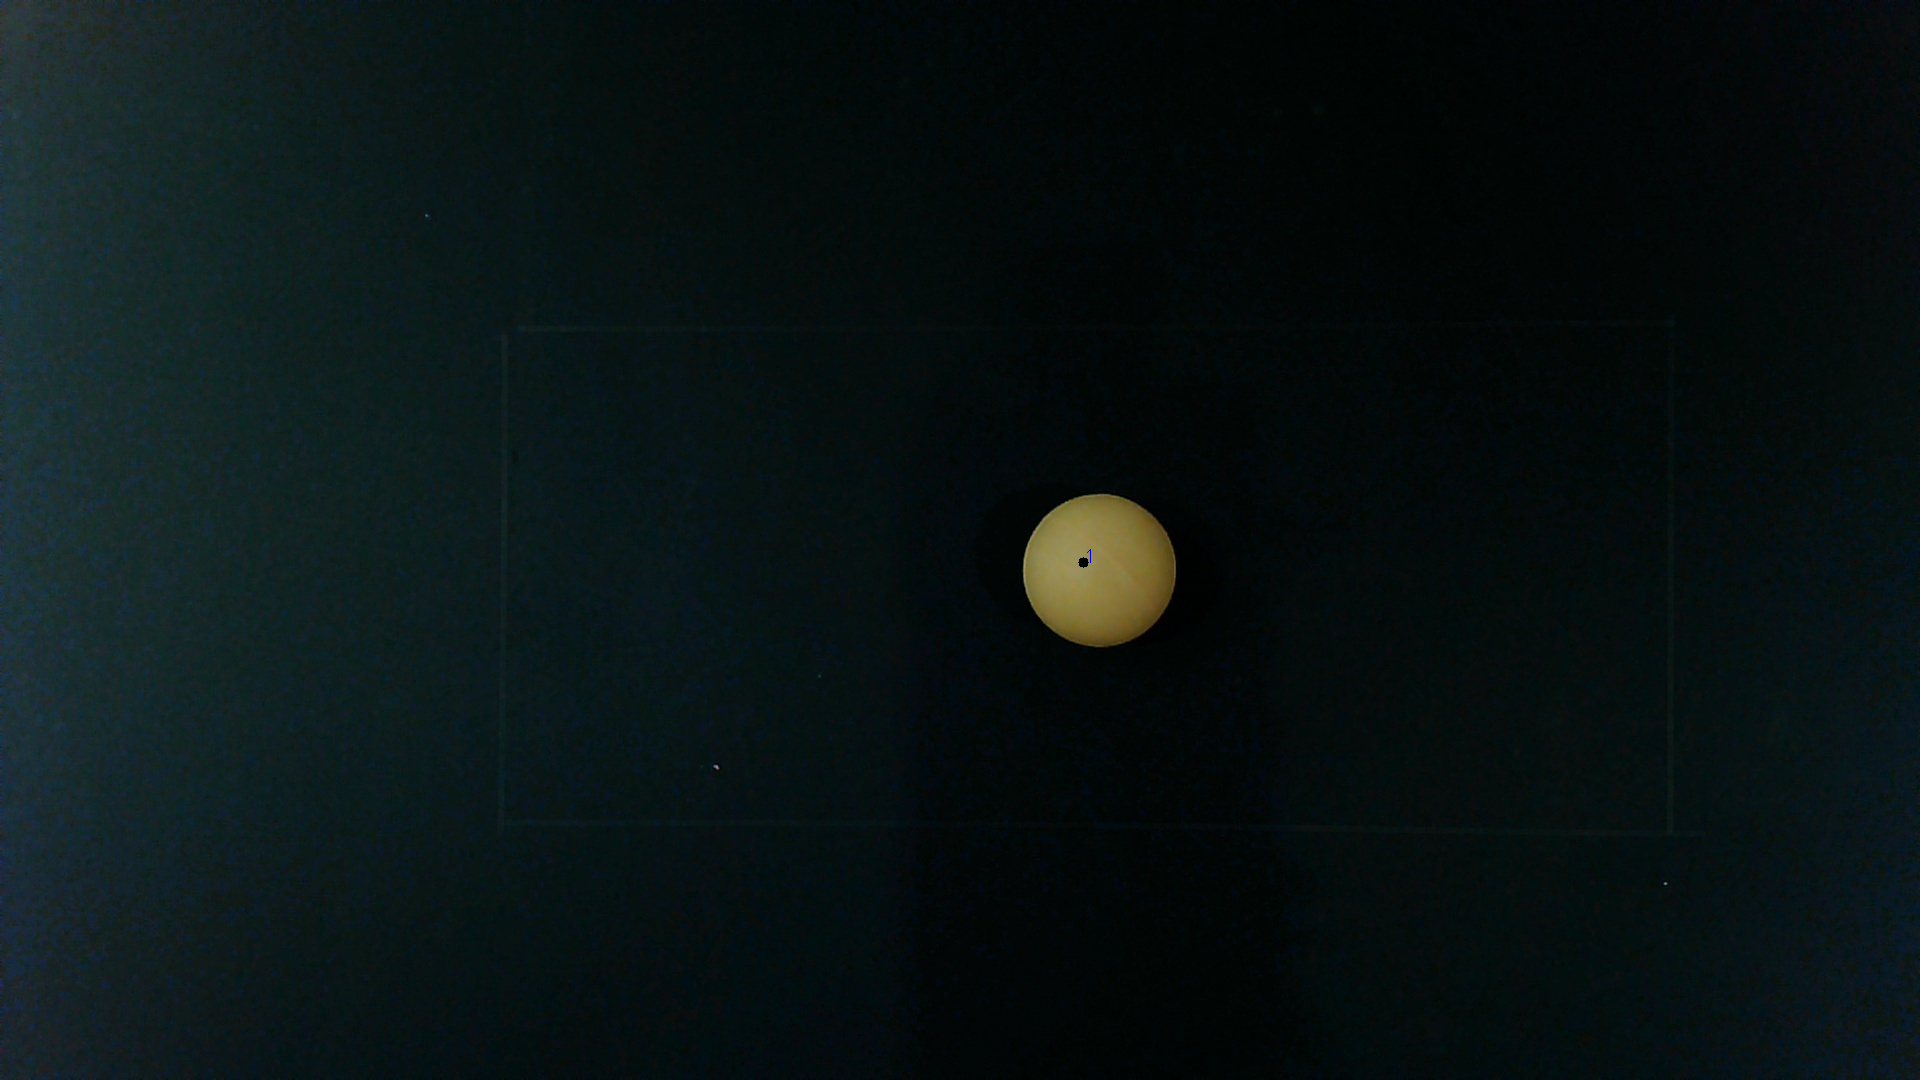

In [ ]:
prev_cx = 0
prev_cy = 0
####以下是找中心及形狀辨識
      #自剛剛的下載路徑中讀入檔案
img = cv2.imread('/content/drive/MyDrive/[NTUST]/5G Robot demo/Firebase資訊/1.jpeg')
      #顯示原始圖檔
cv2_imshow(img)
      #灰階化處理
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)
      #邊緣檢測前必須高斯濾波
blurred = cv2.GaussianBlur(img_gray, (11,11), 0) #高斯濾波
cv2_imshow(blurred)
      #黑色遮罩
img_th = cv2.inRange(blurred,110,255)
cv2_imshow(img_th)
      #邊緣檢測
img_can = cv2.Canny(img_th, 50, 150)
cv2_imshow(img_can)

      #找輪廓線，回傳為一陣列
cont_all, h = cv2.findContours(img_can, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in cont_all]
maxarea_index = np.argmax(areas)
      #面積最大的那條輪廓線
cont = cont_all[maxarea_index]
      #複製一張圖片才不會修改到原圖
img_copy = img_th.copy()
      #做輪廓線
cv2.drawContours(img_copy, cont, -1, (255, 0 ,0), 3)
cv2_imshow(img_copy)
      #計算物體中心
m = cv2.moments(cont)
x = np.int0(m['m10']/m['m00'])
y = np.int0(m['m01']/m['m00'])

      #cv2.drawContours(img_copy, cont, -1, (255, 0 ,0), 3)
shapename = None
(_, radius) = cv2.minEnclosingCircle(cont)
if cv2.contourArea(cont) / (np.pi * radius **2) > 0.9:
    shapename = 1
else:
  e = 0.05 * cv2.arcLength(cont, True)
  simple_contour = cv2.approxPolyDP(cont, epsilon = e, closed = True)
  num_sides = simple_contour.shape[0]
  shapename = { 3: 3, 4: 4}.get(num_sides, 'UN')
  status = 1

      #將辨識文字放在形狀中心
cv2.circle(img, (x, y), 5, (0, 0, 0), -1)
cv2.putText(img, str(shapename), (x, y), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.6, color=(255, 0, 0), thickness=1)
cv2_imshow(img)


In [ ]:
 img.shape

(1080, 1920, 3)

In [ ]:
x-960

43

In [ ]:
y-540

20

In [ ]:
arearect = cv2.minAreaRect(cont)

In [ ]:
box = cv2.boxPoints(arearect)
print(box)
a_x = box_points[0][0][0]
a_y = box_points[0][0][1]
b_x = box_points[0][1][0]
b_y = box_points[0][1][1]
c_x = box_points[0][2][0]
c_y = box_points[0][2][1]

[[ 857.399    532.76874]
 [ 852.52875  376.92096]
 [1008.7824   372.03802]
 [1013.65265  527.8858 ]]


NameError: ignored

In [ ]:
#cv2.drawContours(img, [box], -1, (0, 255, 0), 2) #用綠色畫出矩形
cv2.drawContours(img_copy, [box], -1, (255, 0 ,0), 3)

cv2_imshow(img)
a_x = box_points[0][0][0]
a_y = box_points[0][0][1]
b_x = box_points[0][1][0]
b_y = box_points[0][1][1]
c_x = box_points[0][2][0]
c_y = box_points[0][2][1]

error: ignored